In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv1 = "movie_data/movies.csv"
csv2 = "movie_data/ratings.csv"

In [59]:
movies = pd.read_csv(csv1)
ratings = pd.read_csv(csv2)

In [60]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [61]:
# extract year from title column
movies['year'] = movies.title.str.extract('.*\((.*)\).*',expand = False)
movies = movies.dropna()

In [62]:
# finding erroneous strings within years column
non_years = movies.year.unique()
remove = []

for n in non_years:
    if len(n) > 4:
        remove.append(n)
remove

['Das Millionenspiel',
 '1983)',
 'Your Past Is Showing',
 'Close Relations',
 '2006–2007']

In [63]:
# removing erroneous strings

movies = movies[movies['year'].str.contains('1983\)')==False]
movies = movies[movies['year'].str.contains('Das Millionenspiel')==False]
movies = movies[movies['year'].str.contains('Your Past Is Showing')==False]
movies = movies[movies['year'].str.contains('Close Relations')==False]
movies = movies[movies['year'].str.contains('2006–2007')==False]

In [64]:
# convert years to numeric (int)

movies.year = pd.to_numeric(movies.year)
movies.year.dtype

dtype('int64')

In [65]:
genres = []
for i in range(len(movies.genres)):
    try:
        for n in movies.genres[i].split('|'):
            if n not in genres:
                genres.append(n)
    except:
        pass
print(f'There are {len(genres)} genres')

There are 20 genres


In [66]:
# movie_test = movies.sample(100).reset_index()
# movie_test.head()

,index,movieId,title,genres,year
0,12786,63391,Goyokin (1969),Action|Drama,1969
1,14490,76149,Ollin oppivuodet (1920),Drama,1920
2,51229,182691,Philosophy Coffee (2015),Adventure|Drama,2015
3,9184,27359,Purely Belter (2000),Adventure|Comedy|Drama,2000
4,51137,182487,Bethany (2017),Horror,2017


In [67]:
# split first genre out of list of genres
movies['genre'] = ''
for i in range(len(movies)):
    try:
        g = list(movies.genres[i].split('|'))
        genre.append(g[0])
        movies['genre'][i] = g[0]
    except:
        pass

/var/folders/t9/7dwkhqkd7zqdm5tvqrym5q4m0000gn/T/ipykernel_90247/4011671722.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genre'][i] = g[0]


In [68]:
movies.groupby(['genre']).count().sort_values('title', ascending=False)

,movieId,title,genres,year
genre,,,,
Drama,15212,15212,15212,15212
Comedy,13580,13580,13580,13580
Action,7304,7304,7304,7304
Documentary,5096,5096,5096,5096
(no genres listed),4750,4750,4750,4750
Horror,3410,3410,3410,3410
Crime,3024,3024,3024,3024
Adventure,2476,2476,2476,2476
Animation,2064,2064,2064,2064


In [70]:
movies = movies[movies['genre'].str.contains('(no genres listed)')==False]
movies = movies[movies['genre'].str.contains('IMAX')==False]
movies.groupby(['genre']).count().sort_values('title', ascending=False)

/var/folders/t9/7dwkhqkd7zqdm5tvqrym5q4m0000gn/T/ipykernel_90247/3758869926.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  movies = movies[movies['genre'].str.contains('(no genres listed)')==False]


,movieId,title,genres,year
genre,,,,
Drama,15212,15212,15212,15212
Comedy,13580,13580,13580,13580
Action,7304,7304,7304,7304
Documentary,5096,5096,5096,5096
Horror,3410,3410,3410,3410
Crime,3024,3024,3024,3024
Adventure,2476,2476,2476,2476
Animation,2064,2064,2064,2064
Children,1342,1342,1342,1342


In [76]:
avg_rating = ratings.groupby('movieId').rating.mean()
movie = pd.merge(movies,avg_rating,how='outer',on='movieId')
movie['rating'].fillna('0',inplace=True)
movie = movie.drop(columns={'genres'})
movie.head()

,movieId,title,year,genre,rating
0,1,Toy Story (1995),1995.0,Adventure,3.893708
1,2,Jumanji (1995),1995.0,Adventure,3.251527
2,3,Grumpier Old Men (1995),1995.0,Comedy,3.142028
3,4,Waiting to Exhale (1995),1995.0,Comedy,2.853547
4,5,Father of the Bride Part II (1995),1995.0,Comedy,3.058434


In [197]:
def plot_num_movies_by_genre(genre, year_min, year_max):
    year_df = movie.loc[(movie.year >= year_min) & (movie.year <= year_max)]
    year_df2 = year_df.groupby('year').count()
    count = year_df.loc[movie.genre == genre].groupby('year').count()
#     plt.plot(count label=genre, c='steelblue')
#     plt.xlabel('Year')
#     plt.ylabel('Number of Movies Released')
#     plt.title(f'Number of movies released over the Years')
#     plt.savefig('images/plots/all-movies.png')
#     plt.show()
    
    ###################
    col1 = 'steelblue'
    col2 = 'brown'

    #define subplots
    fig,ax = plt.subplots()

    #add first line to plot
    ax.plot(year_df2, color=col1, label='All Movies')

    #add x-axis label
    ax.set_xlabel('Year', fontsize=14)

    #add y-axis label
    ax.set_ylabel('All Movies', color=col1, fontsize=16)

    #define second y-axis that shares x-axis with current plot
    ax2 = ax.twinx()

    #add second line to plot
    ax2.plot(count, color=col2, label=genre)

    #add second y-axis label
    ax2.set_ylabel(f'{genre} Movies', color=col2, fontsize=16)
    fig.savefig(f'images/plots/{genre.lower()}-combined')

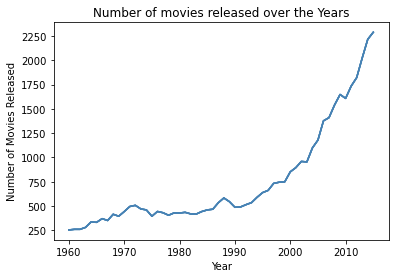

In [198]:
plot_num_movies_by_genre('Action', 1960, 2015)

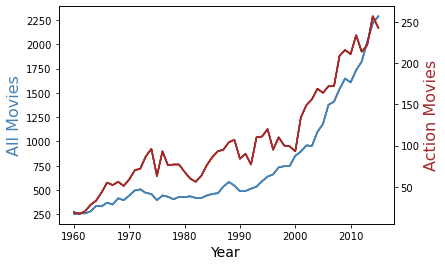

In [187]:
plot_num_movies_by_genre('Action', 1960, 2015)